In [2]:
import numpy as np
import pandas as pd
from numpy.random import random
import matplotlib.pyplot as plt
import torch


def loss(X, y, theta):
    temp = np.dot(X, theta) - y
    return np.sum(np.power(temp, 2)) / (2*m)

def update_for_animation():
        global theta
        temp = X@theta - y
        temp = X.transpose(1,0)@temp
        theta = theta - (alpha/len(X)) * temp

def animate(i):
    update_for_animation()
    line.set_ydata(X@theta)
    return line,

# Bedeutung von Rechnerarchitekturen für das Maschinelle Lernen

    Dr.-Ing. Rüdiger Alshut

### Vergleich einer linearen Regression auf der CPU und auf der GPU
<img src="images/GeradenGleichung.png" alt="term-document matrix" style="width: 60%"/>

In [25]:
w_tatsaechlich = np.array([[2],[5]])

In [11]:
n=1000

#Get points on a line and add some noise

X = random(n)
noise=np.random.normal(0,.4,n).reshape((n, 1))
X=X[:,np.newaxis];X = np.hstack((X,np.ones_like(X)))
X[:3]

array([[0.7875961 , 1.        ],
       [0.50479488, 1.        ],
       [0.93861249, 1.        ]])

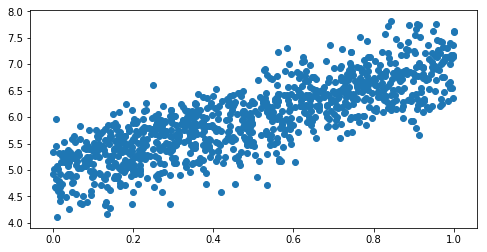

In [24]:
y = X@w_tatsaechlich
y=y+noise
plt.figure(figsize=(8,4));_ = plt.scatter(X[:,0],y)

### Vergleich einer linearen Regression auf der CPU und auf der GPU
<img src="images/GradienDescentOverview.png" alt="Vergleich Gradient Descent" style="width: 50%"/>


\vspace{2cm}
Gradienten Abstiegsverfahren über $m$ Beispiele und den Parametern $(w_1,w_2)$ :

- Abschätzung der Gerade mit den derzeitigen Parametern:
\begin{align*}\label{eq:Abschaetzung}
\hat y=\hat w_1x+\hat w_2\\
\end{align*}


\begin{align*}\label{eq:GradienDescent_Wdh}
\text{Wiederhole:}\{\quad\quad\quad\quad\quad\quad\\
\hat w_1 =& \, \hat w_1 - \alpha \frac{1}{m}\sum\limits_{i=1}^m(\hat y_i - y_i) x_i\\
\hat w_2 =& \, \hat w_2 - \alpha \frac{1}{m}\sum\limits_{i=1}^m(\hat y_i - y_i)\\
\}
\end{align*}

In [17]:
def gradientDescent(X, y, w, lernrate, iterations):
    for _ in range(iterations):
        y_dach = X@w - y
        gradienten = X.transpose(1,0) @ y_dach
        w = w - (lernrate/len(X)) * gradienten
    return w

In [18]:
%%time
w = np.zeros([2,1])
iterations = 100
alpha = 0.1
w = gradientDescent(X, y, w, alpha, iterations)
print(w)

[[2.25726981]
 [4.85321107]]
Wall time: 8.99 ms


In [19]:
%%time
X_t=torch.from_numpy(X).cuda()
y_t=torch.from_numpy(y).cuda()
w_t = torch.from_numpy(w).cuda()
w = gradientDescent(X_t, y_t, w_t, alpha, iterations)
w.cpu().numpy()

Wall time: 3.44 s


In [20]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [21]:
theta = np.zeros([2,1]);alpha = 0.01;fig = plt.figure();plt.scatter(X[:,0], y, c='orange');line, = plt.plot(X[:,0], X@theta);plt.close();theta = np.zeros([2,1]);
animation.FuncAnimation(fig, animate, np.arange(0, 200), interval=10)

```
# this code block is within triple backquotes
```

Here we have defined `header`, `footer` and `backimage` - [see also the customization doc](http://rise.readthedocs.io/en/latest/customize.html).

See [this other notebook](overlay.ipynb) for a short description of how to use `overlay` instead.